In [36]:
import pandas as pd 
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

df = pd.read_csv(r'C:\Users\acer\Desktop\6th sem project\output.csv')

In [37]:
df

,cid,text,time,author
0,UgyhDi6HmVVYCZ3CoKN4AaABAg,nice﻿,1 week ago,Akshay jadhav
1,UgyhDi6HmVVYCZ3CoKN4AaABAg.8ro20d8_0mC8roVxuYpaRC,thanks!﻿,1 week ago,Bharatendra Rai
2,UgyqKlNw1tN_jLOd1LF4AaABAg,"may someone could help me why am I getting ""No...",3 weeks ago,9834 Ljk
3,Ugyz8WOzqPQP_fmSsWJ4AaABAg,Sir following code was running correctly earli...,3 weeks ago,Sachin Jaisar
4,Ugyi5X7A69l1HTw-yCh4AaABAg,Great and very nice explain 👌👌💐💐💐💐👍﻿,1 month ago,Dnyaneshwar Panchal
...,...,...,...,...
195,UgyOfeExSEV_o6Glilh4AaABAg.8ZoszTpVNcE8ZtWIKbJa7j,"I tried this modification. Unfortunately, it i...",1 year ago,DEBASMITA DEY
196,UgyOfeExSEV_o6Glilh4AaABAg.8ZoszTpVNcE8Zw0AfdG705,probably you missed something in earlier lines...,1 year ago,Bharatendra Rai
197,UgyOfeExSEV_o6Glilh4AaABAg.8ZoszTpVNcE8_Wdphd2Zh7,"I am also getting the same error, if you got a...",1 year ago,Kishor Kumar
198,UgyOfeExSEV_o6Glilh4AaABAg.8ZoszTpVNcE8adK0HVk1dw,i think you left spaces while copying the API ...,1 year ago,Febin Xavier RCBS


In [45]:
class SentimentAnalyzer(object):
    def __init__(self):
        pass
     
    def clean_text(self, text):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    
    def get_sentiment(self, text):
        cleaned_text = self.clean_text(text)
        analysis = TextBlob(cleaned_text)
        polarity = analysis.sentiment.polarity
        if polarity > 0:
            return 'positive'
        elif polarity < 0:
            return 'negative'
        else:
            return 'neutral'
    def analyze_sentiments(self, dataset):
        
      
        dataset['sentiment'] = dataset['text'].apply(self.get_sentiment)
        
        
        total_count = len(dataset)
        positive_count = len(dataset[dataset['sentiment'] == 'positive'])
        negative_count = len(dataset[dataset['sentiment'] == 'negative'])
        neutral_count = len(dataset[dataset['sentiment'] == 'neutral'])
        
        positive_percentage = (positive_count / total_count) * 100
        negative_percentage = (negative_count / total_count) * 100
        neutral_percentage = (neutral_count / total_count) * 100
        
        print("Positive tweets percentage: {:.2f}%".format(positive_percentage))
        print("Negative tweets percentage: {:.2f}%".format(negative_percentage))
        print("Neutral tweets percentage: {:.2f}%".format(neutral_percentage))
        
        
        print("\n\nSample Positive Texts:")
        print(dataset[dataset['sentiment'] == 'positive'].head())
        print("\n\nSample Negative Texts:")
        print(dataset[dataset['sentiment'] == 'negative'].head())

In [47]:
analyzer = SentimentAnalyzer()

In [49]:
analyzer.analyze_sentiments(df)

Positive tweets percentage: 45.00%
Negative tweets percentage: 18.00%
Neutral tweets percentage: 37.00%


Sample Positive Texts:
                                                 cid  \
0                         UgyhDi6HmVVYCZ3CoKN4AaABAg   
1  UgyhDi6HmVVYCZ3CoKN4AaABAg.8ro20d8_0mC8roVxuYpaRC   
4                         Ugyi5X7A69l1HTw-yCh4AaABAg   
5  Ugyi5X7A69l1HTw-yCh4AaABAg.8qgqqUosvG38qjMPnJzUz-   
6                         Ugx95GPQ8mrdoVmI4MZ4AaABAg   

                                                text         time  \
0                                              nice﻿   1 week ago   
1                                           thanks!﻿   1 week ago   
4               Great and very nice explain 👌👌💐💐💐💐👍﻿  1 month ago   
5                              Thanks for comments!﻿  1 month ago   
6  Sir, you works helped me a lot :) Thank you ve...  1 month ago   

                author sentiment  
0        Akshay jadhav  positive  
1      Bharatendra Rai  positive  
4  Dnyaneshwar

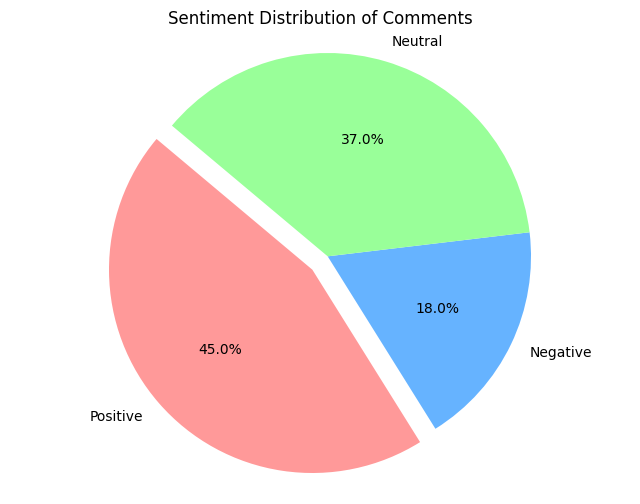

In [50]:
positive_count = df[df['sentiment'] == 'positive'].shape[0]
negative_count = df[df['sentiment'] == 'negative'].shape[0]
neutral_count = df[df['sentiment'] == 'neutral'].shape[0]


labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Comments')
plt.axis('equal') 
plt.show()